In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime

from IPython.core.display import display, HTML

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("weather_data.csv")

In [5]:
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [6]:
df.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [7]:
df.shape

(1000000, 6)

In [8]:

months = ["January", "February", "March",
         "April", "May", "June",
         "July", "August", "September",
         "October", "November", "December"]

weekend = ["Monday", "Tuesday", "Wednesday",
          "Thursday", "Friday", "Saturday", "Sunday"]

def convert_date(x):
    date = x.split()[0]
    date = datetime.strptime(date, "%Y-%m-%d")
    
    return [date.month, date.isoweekday(), date.day]

In [9]:
def bar_label(axes):
    for container in axes.containers:
        axes.bar_label(container, label_type="center", rotation=90)

def plots(df, name, num, axes, date=False):
    group = df.groupby(name)
    mean = group[num].mean()
    if not date:
        sns.barplot(x=mean.index, y=mean, ax=axes)
    else:
        mean = pd.DataFrame(mean)
        mean = mean.sort_index(ascending=True)
        dd = {num: [], "values": []}
        for i in range(mean.shape[0]):
            if name == "month":
                dd[num] += [months[mean.index[i]-1]]
            else:
                dd[num] += [weekend[mean.index[i]-1]]
            dd["values"] += [mean.iloc[i, 0]]
        dd = pd.DataFrame(dd)
        sns.barplot(x=dd.iloc[:, 0].values, y=dd.iloc[:, 1].values, ax=axes)

In [10]:
df = df.sort_values("Date_Time")

In [11]:
df["month"] = df["Date_Time"].apply(lambda x: convert_date(x)[0])
df["weekday"] = df["Date_Time"].apply(lambda x: convert_date(x)[1])
df["day"] = df["Date_Time"].apply(lambda x: convert_date(x)[2])
df["date"] = df["Date_Time"].apply(lambda x: x.split()[0])

In [12]:
nums = df.columns[2:-4]


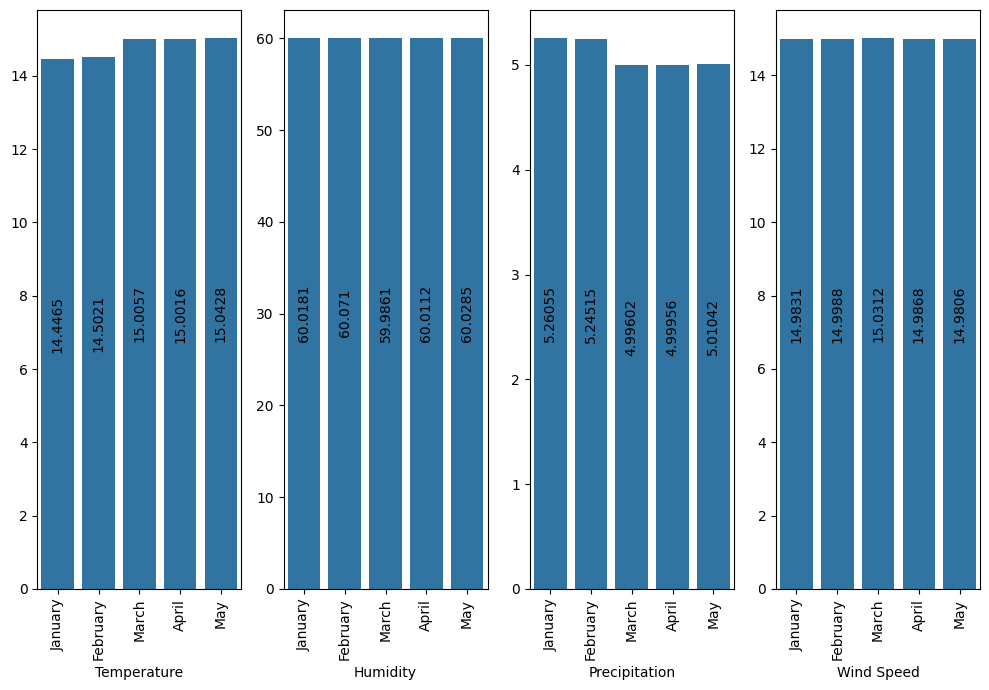

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))

for i, j in enumerate(nums):
    plots(df, "month", j, axes[i], True)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    bar_label(axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel(' '.join(j.split('_')[:-1]))
plt.tight_layout()
plt.show()

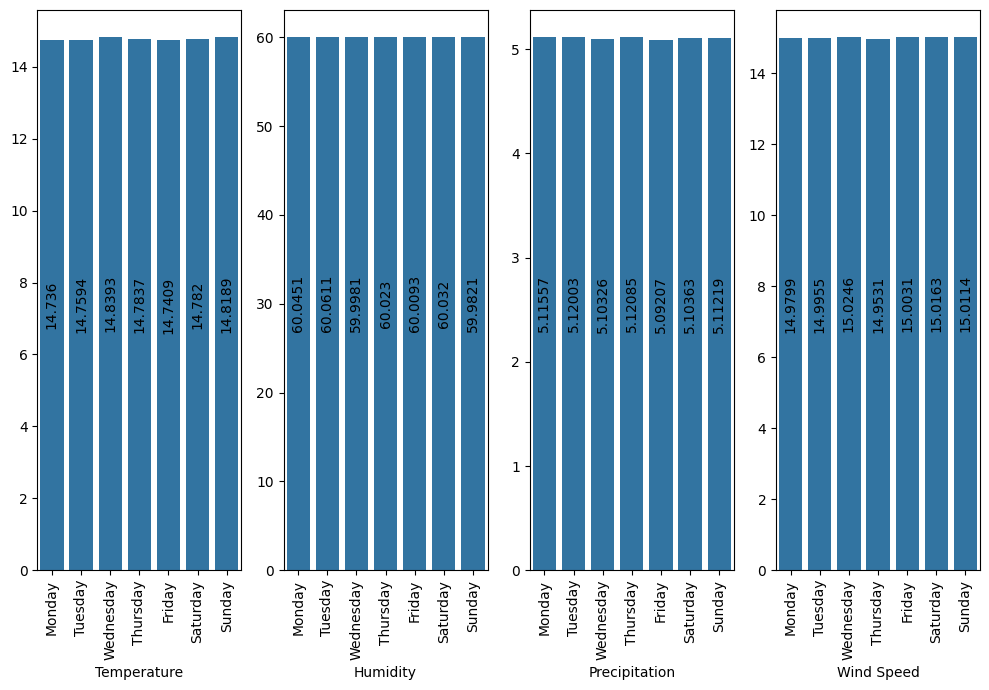

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))

for i, j in enumerate(nums):
    plots(df, "weekday", j, axes[i], True)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    bar_label(axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel(' '.join(j.split('_')[:-1]))
plt.tight_layout()
plt.show()

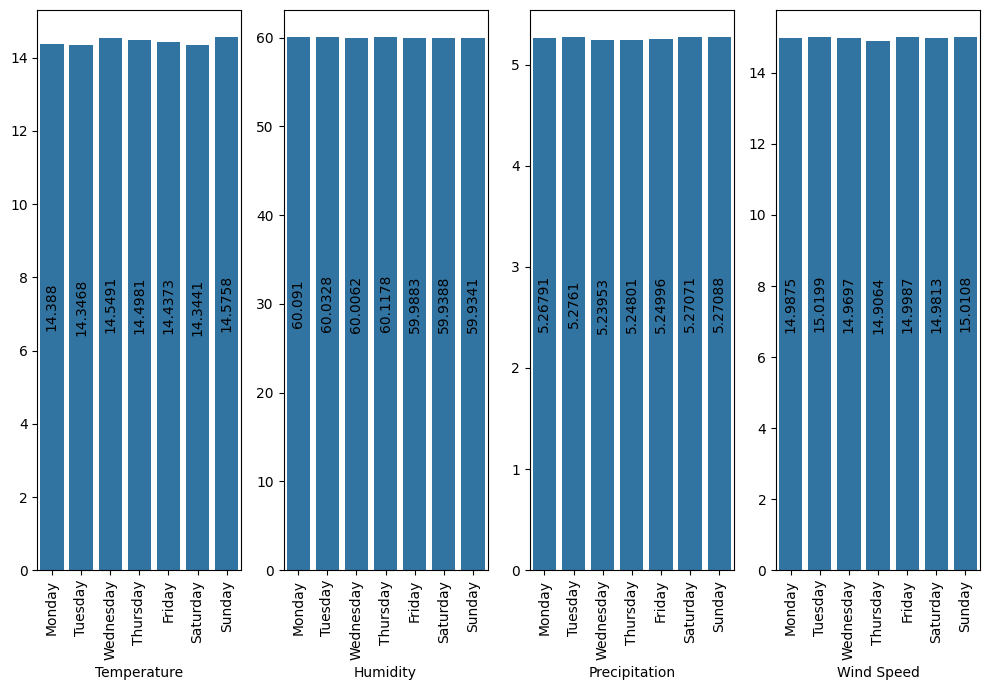

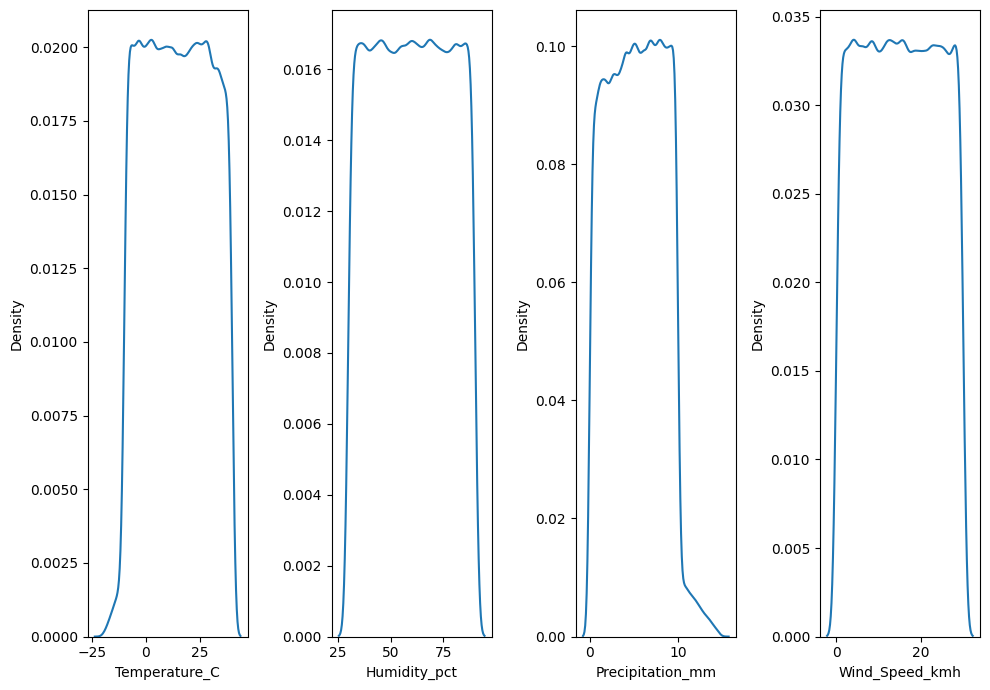

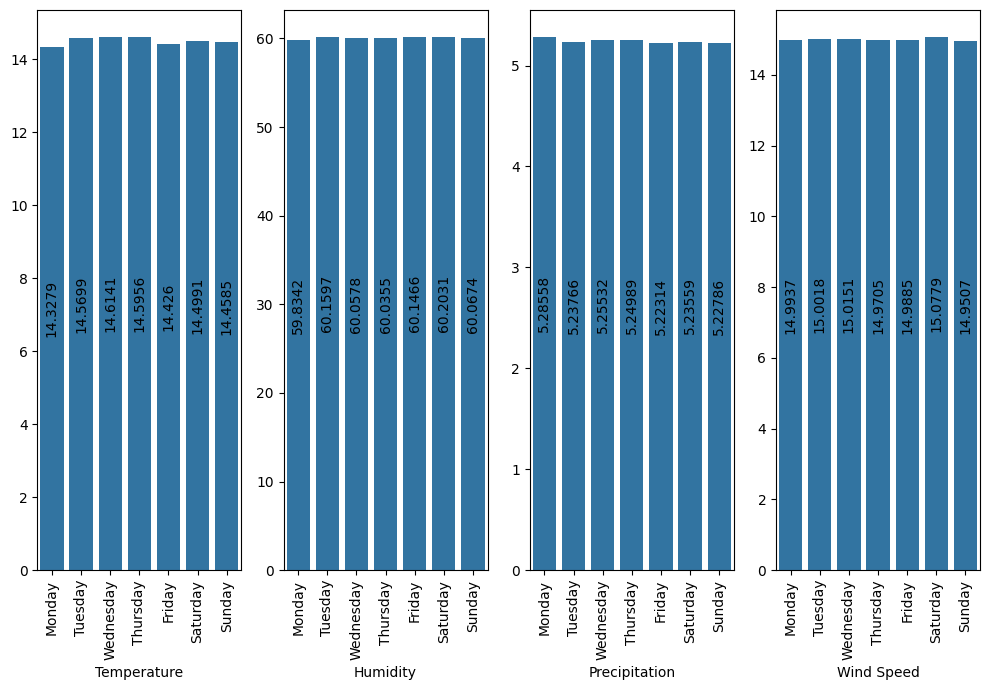

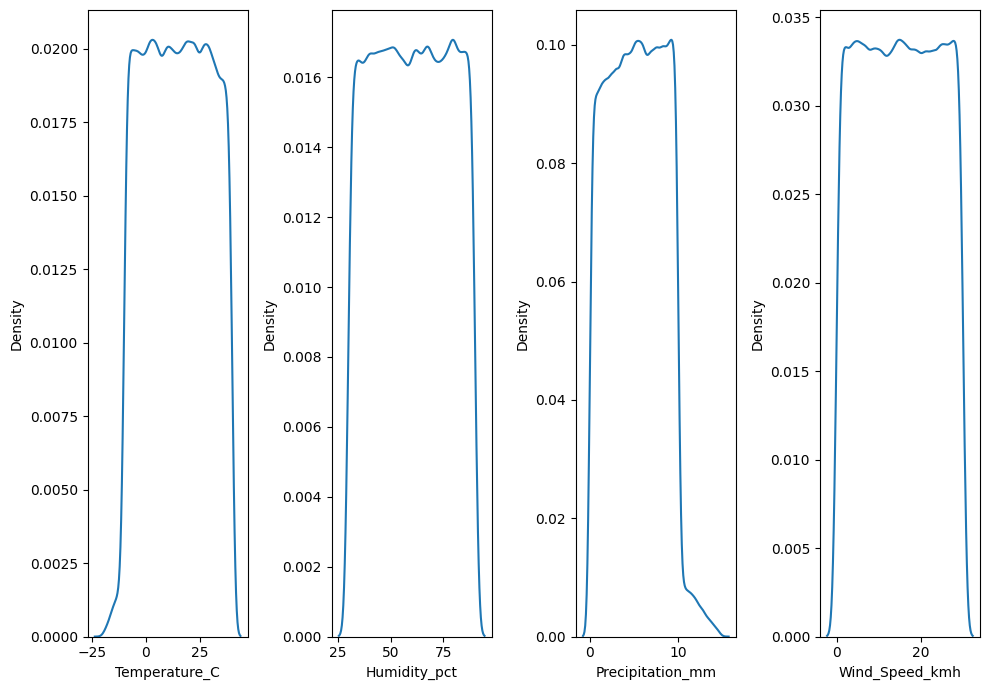

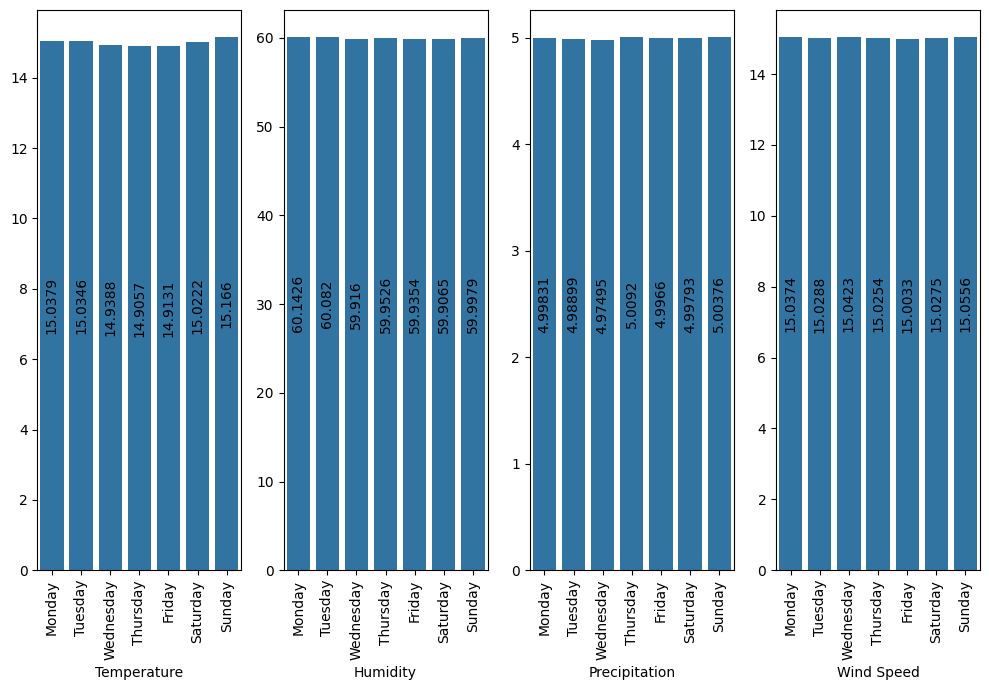

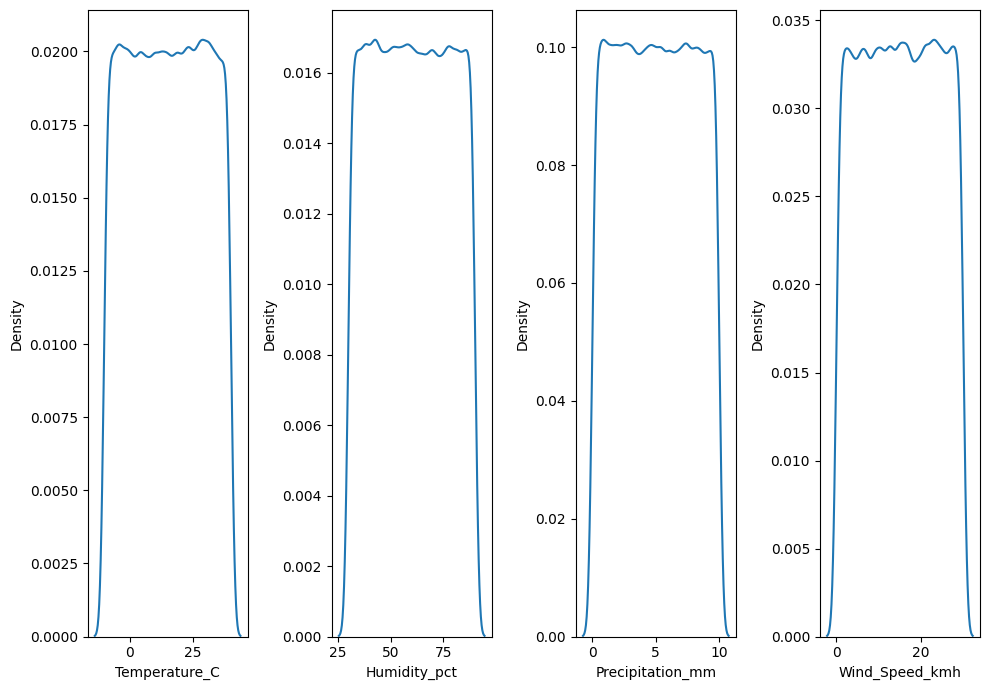

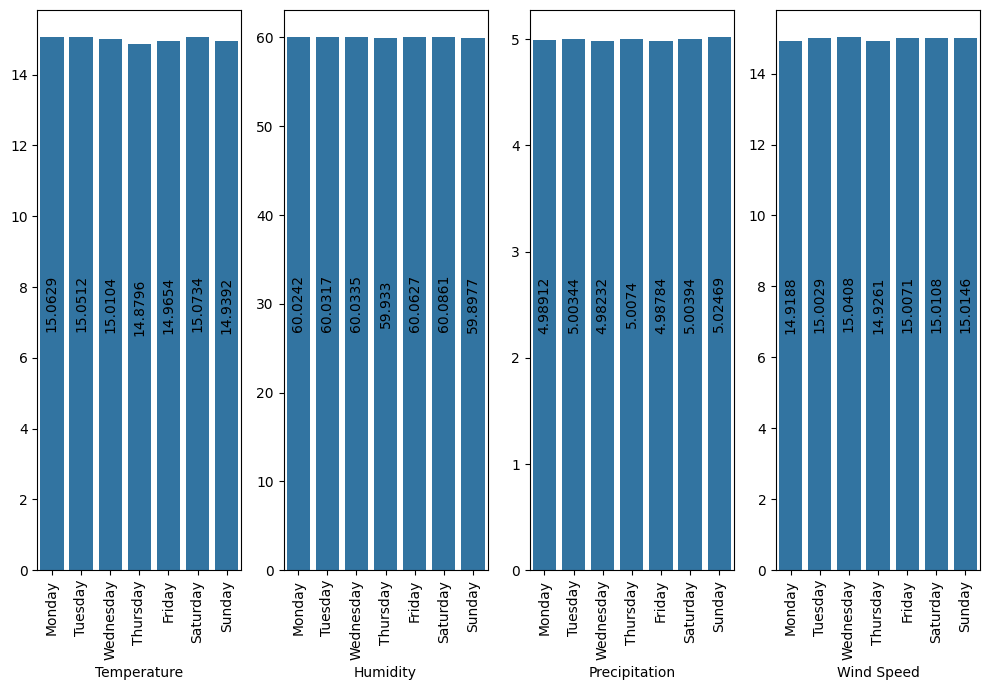

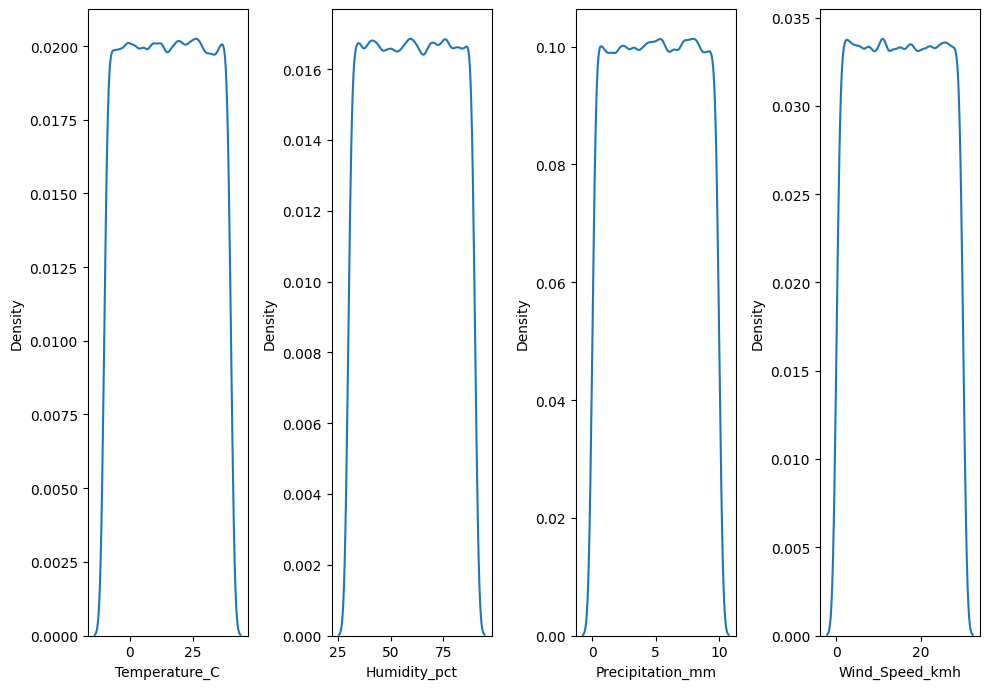

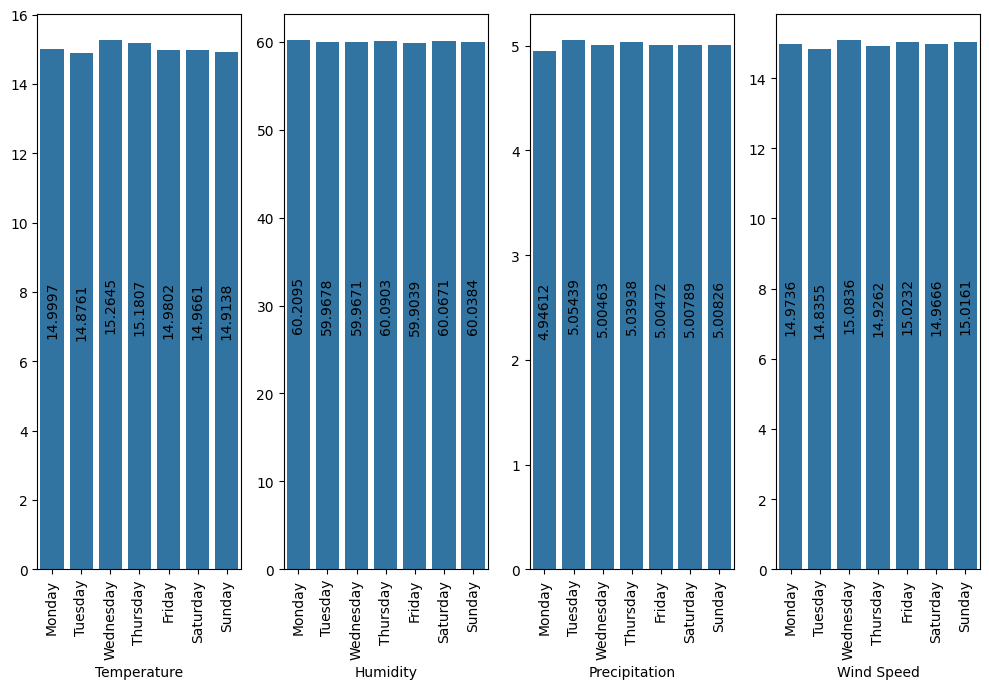

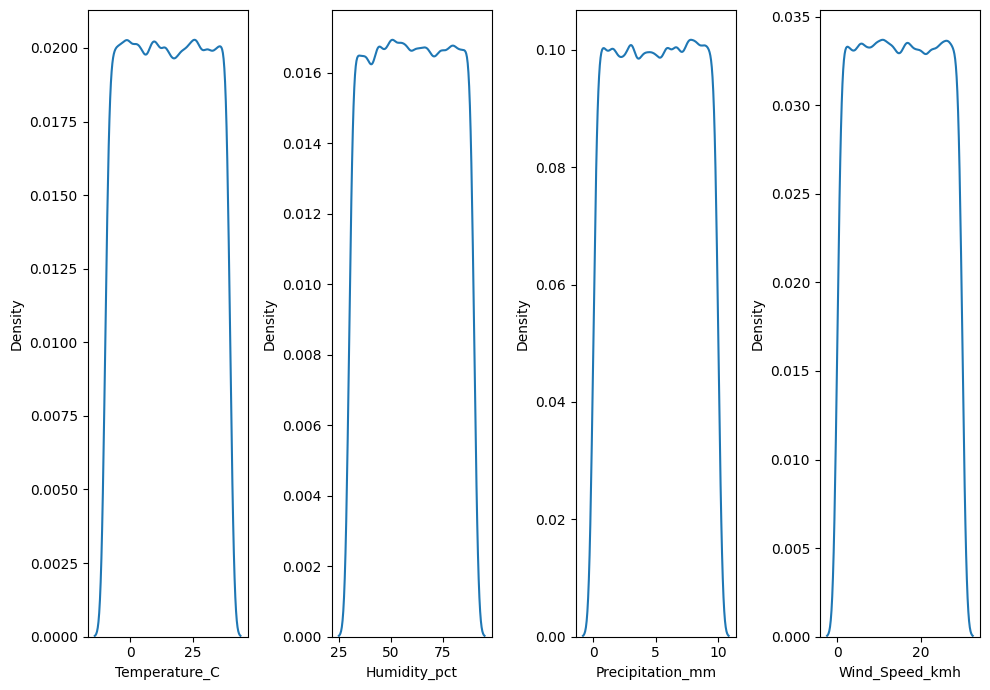

In [15]:

for k in sorted(df["month"].unique()):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
    display(HTML("<h2>Data distribution in {}</h2>".format(months[k-1])))
    temp_df = df[df["month"] == k]
    for i, j in enumerate(nums):
        plots(temp_df, "weekday", j, axes[i], True)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        bar_label(axes[i])
        axes[i].set_ylabel("")
        axes[i].set_xlabel(' '.join(j.split('_')[:-1]))
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
    for i, j in enumerate(nums):
        sns.kdeplot(temp_df, x=j, ax=axes[i])
        
    plt.tight_layout()
    plt.show()

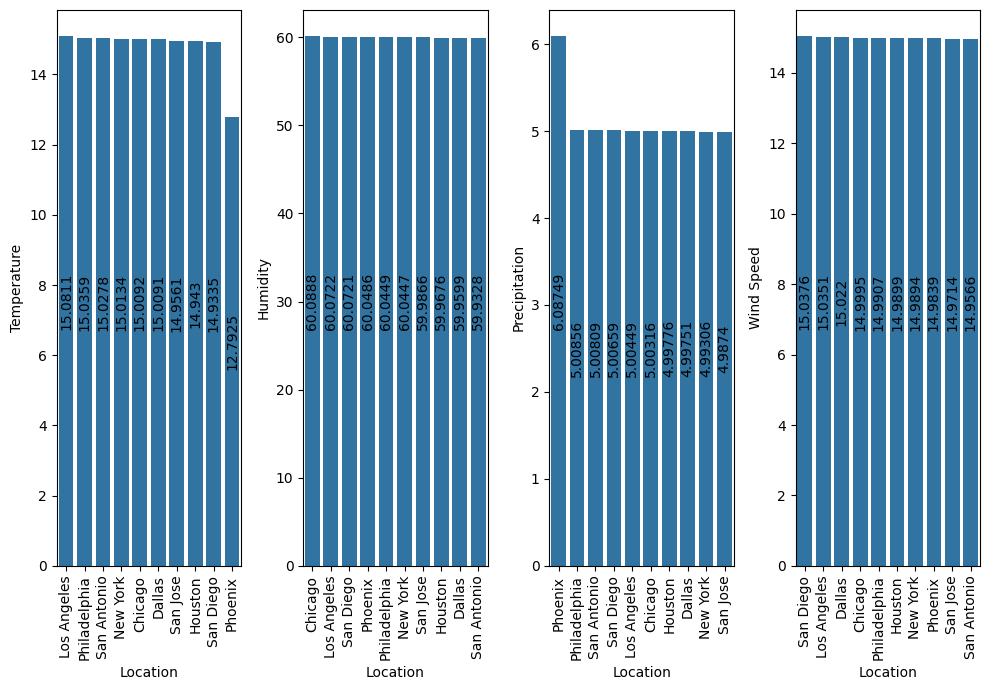

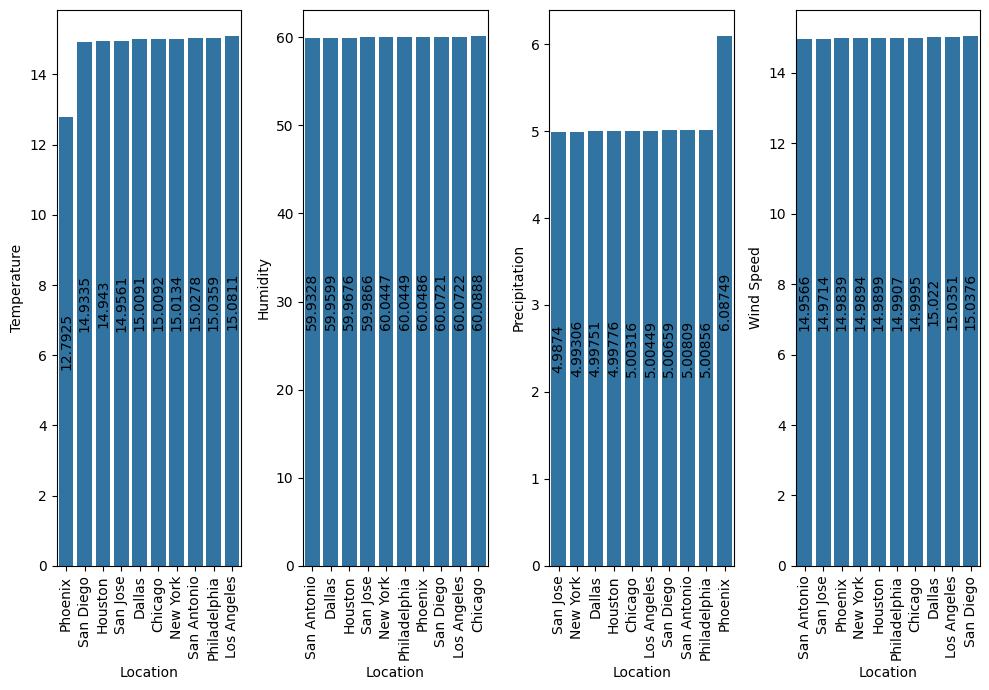

In [16]:
display(HTML("<h2>Top 10 from top to bottom</h2>"))
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
grouped = df.groupby("Location")
for i, j in enumerate(nums):
    mean = grouped[j].mean()
    mean = pd.DataFrame(mean)
    mean = mean.sort_values(j, ascending=False)
    sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[i])
    bar_label(axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_ylabel(' '.join(j.split('_')[:-1]))
plt.tight_layout()
plt.show()

display(HTML("<h2>Top 10 from bottom to top</h2>"))
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
for i, j in enumerate(nums):
    mean = grouped[j].mean()
    mean = pd.DataFrame(mean)
    mean = mean.sort_values(j, ascending=True)
    sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[i])
    bar_label(axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_ylabel(' '.join(j.split('_')[:-1]))
plt.tight_layout()
plt.show()

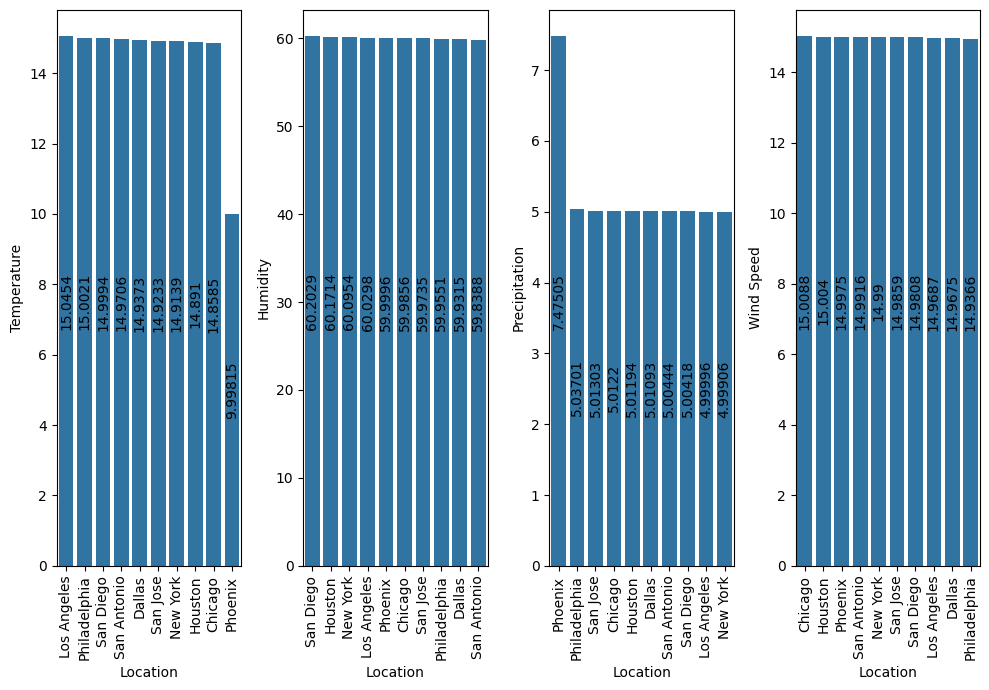

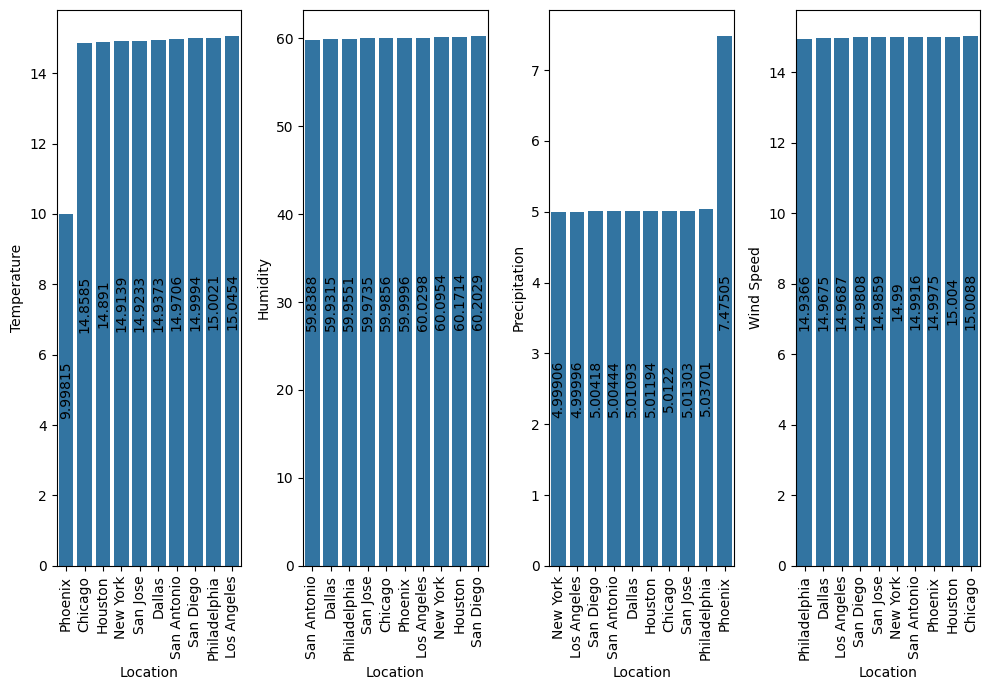

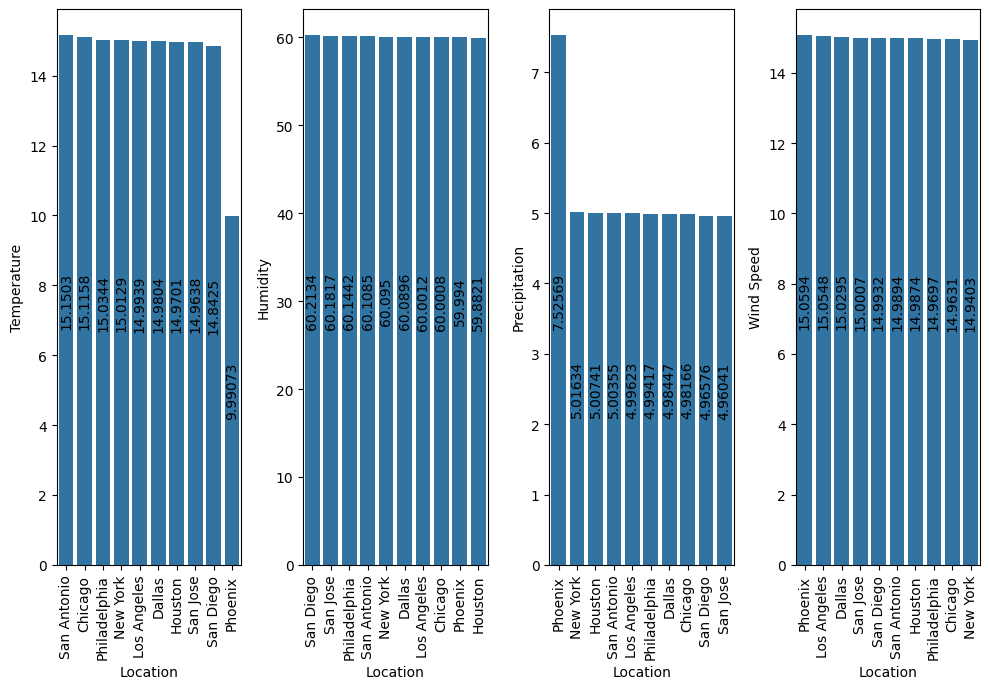

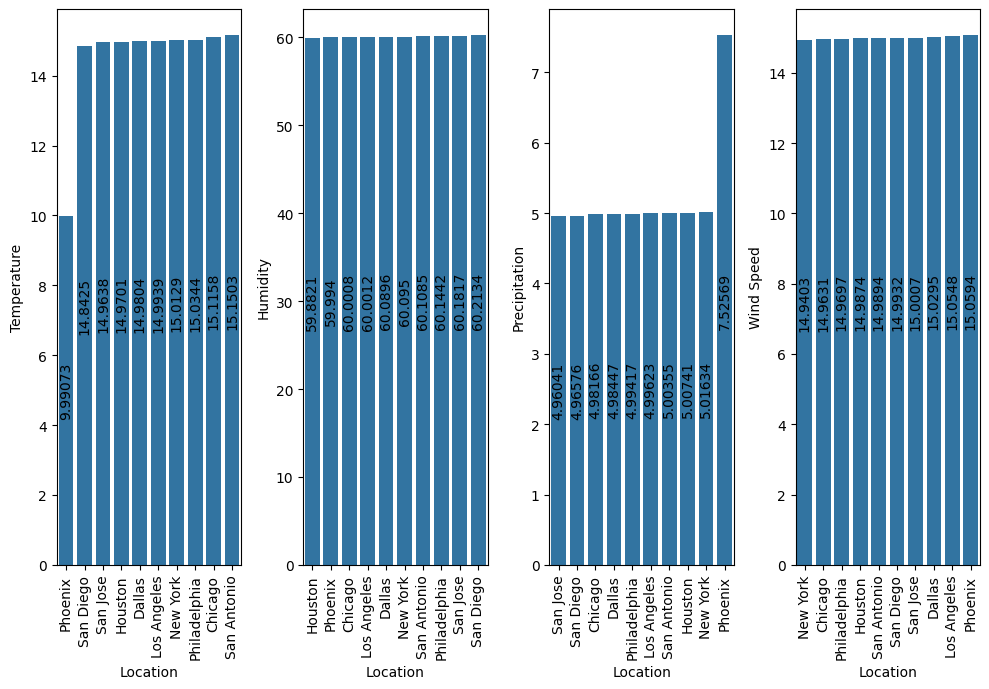

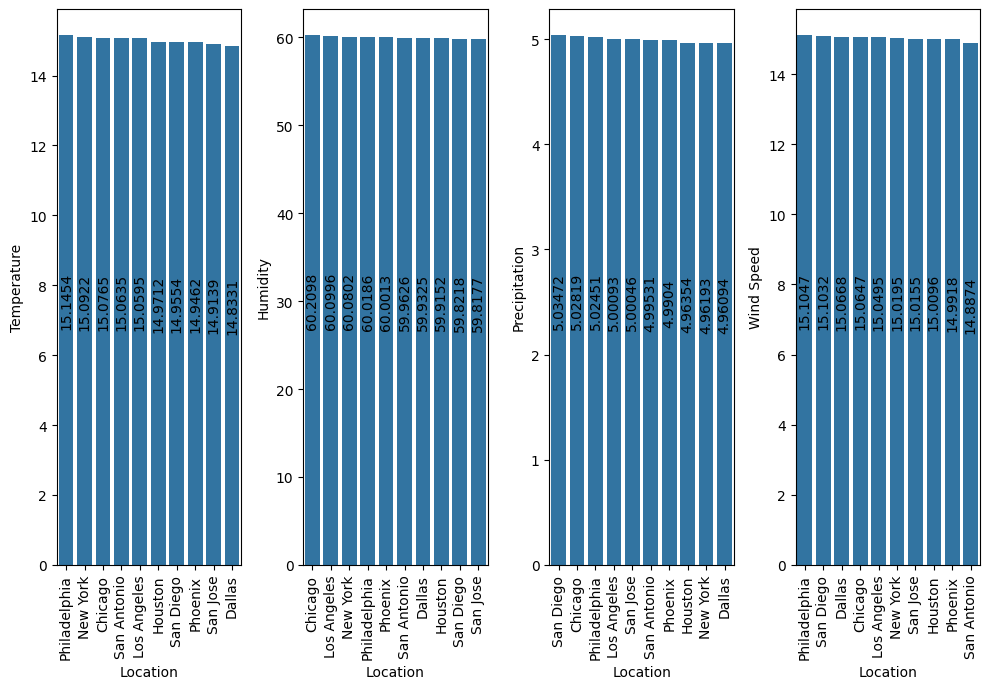

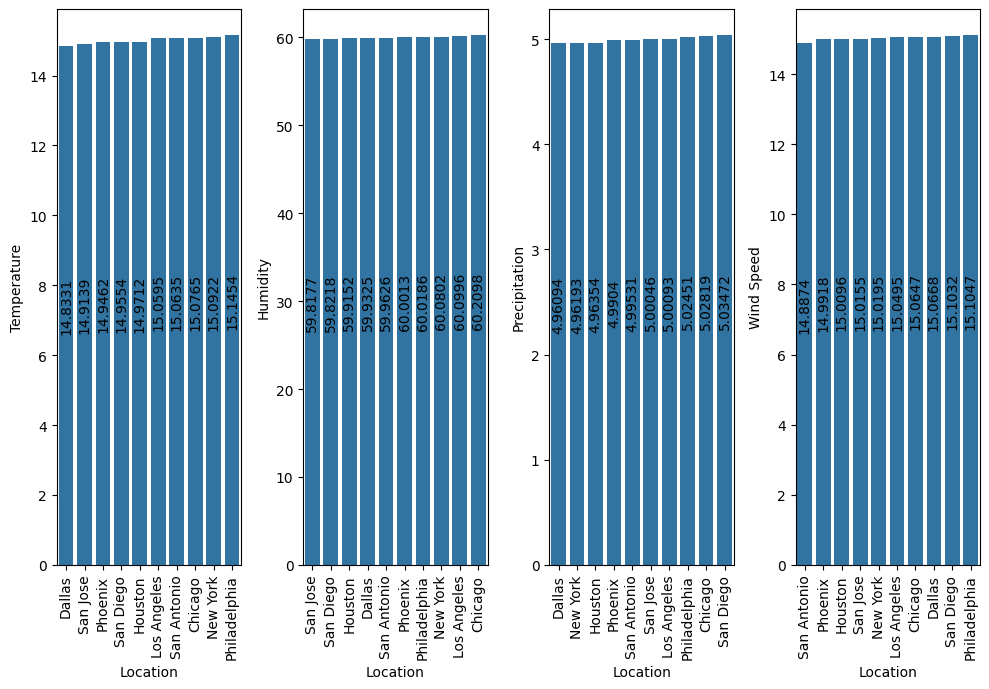

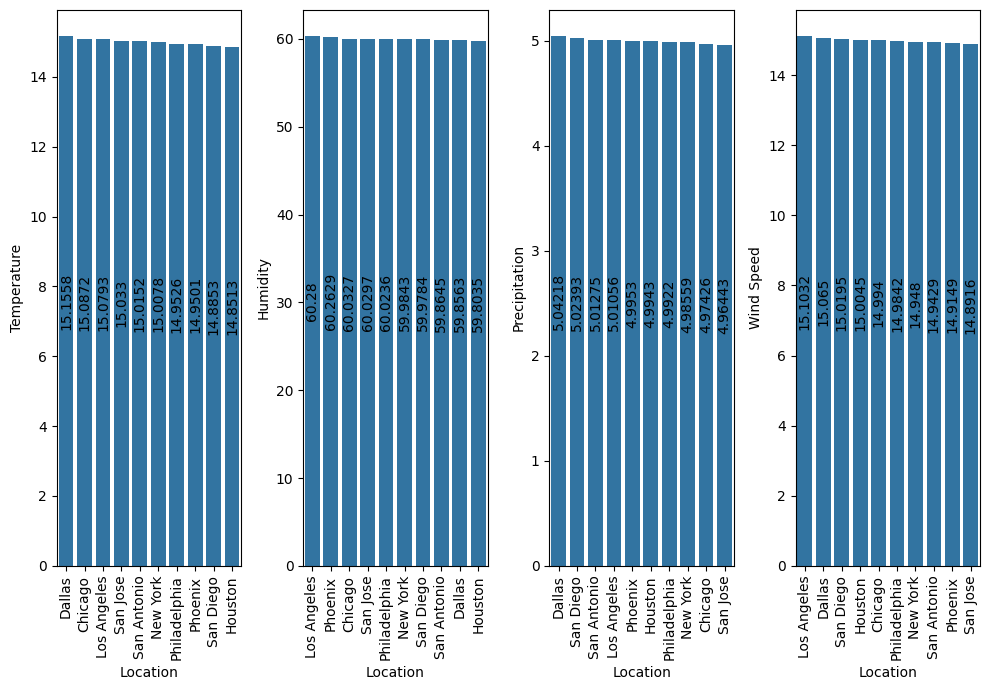

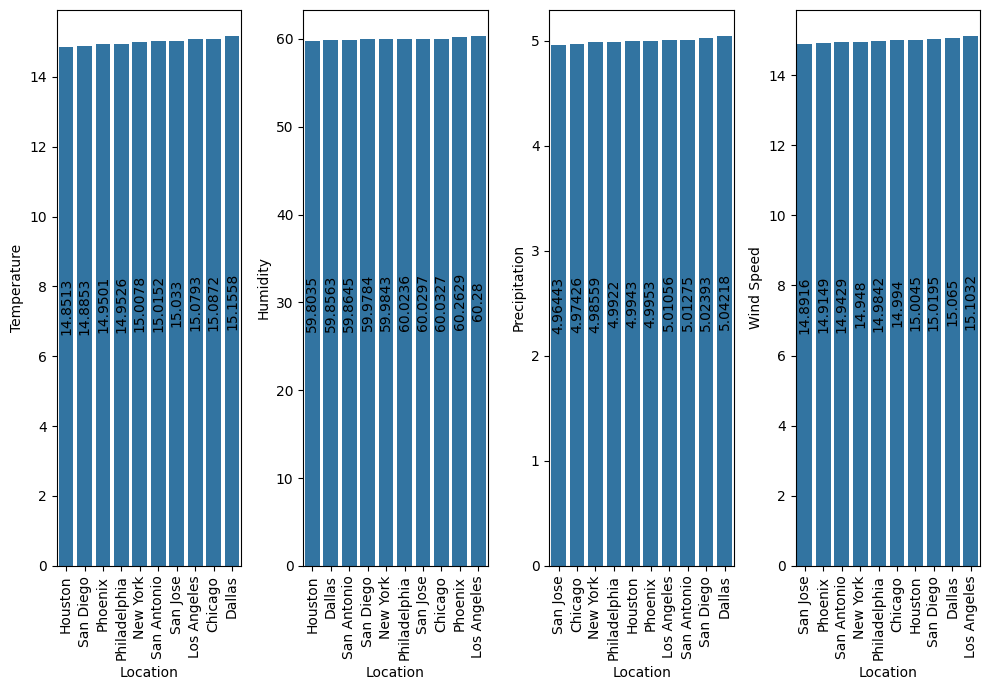

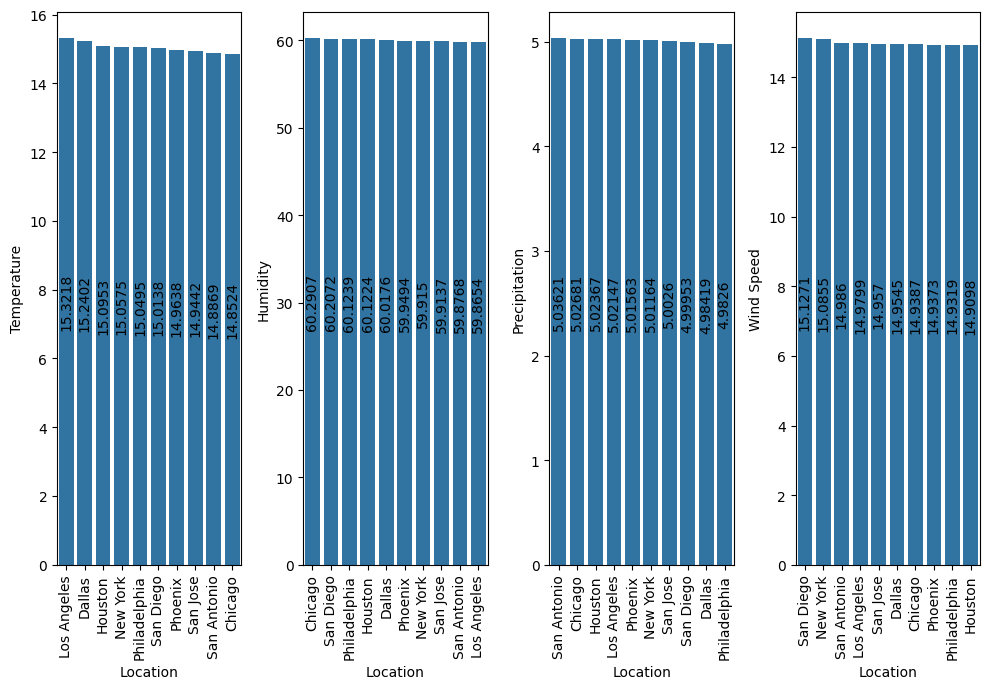

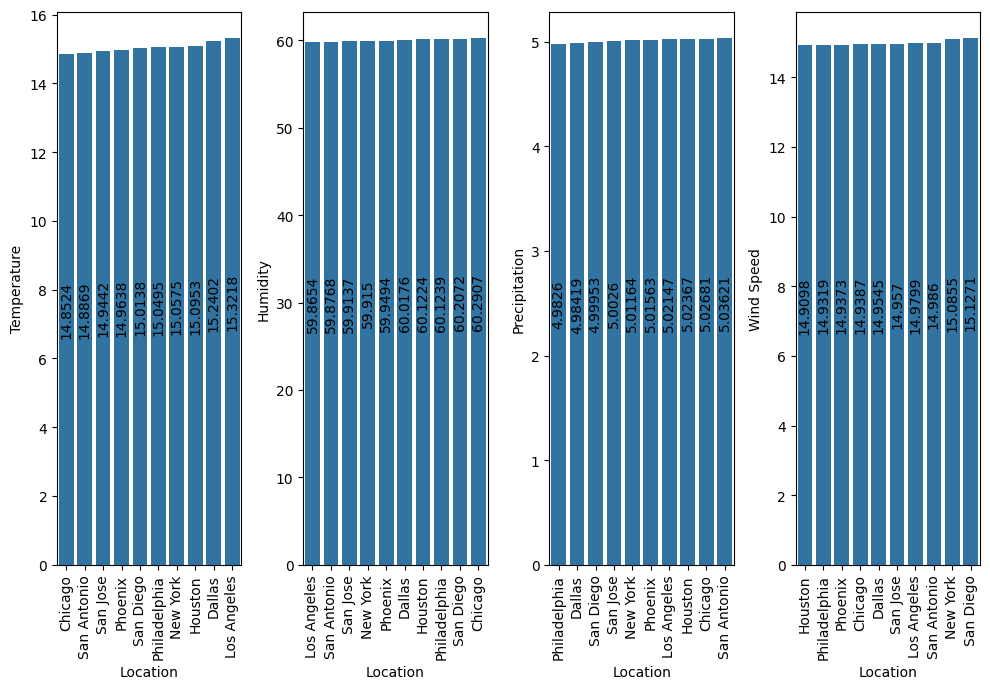

In [18]:
for k in sorted(df["month"].unique()):
    temp_df = df[df["month"] == k]
    display(HTML("<h2>Measures in cities for {}</h2>".format(months[k-1])))
    display(HTML("<h3>Top 10 from top to bottom</h3>"))
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
    grouped = temp_df.groupby("Location")
    for i, j in enumerate(nums):
        mean = grouped[j].mean()
        mean = pd.DataFrame(mean)
        mean = mean.sort_values(j, ascending=False)
        sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[i])
        bar_label(axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        axes[i].set_ylabel(' '.join(j.split('_')[:-1]))
    plt.tight_layout()
    plt.show()

    display(HTML("<h3>Top 10 from bottom to top</h3>"))
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
    for i, j in enumerate(nums):
        mean = grouped[j].mean()
        mean = pd.DataFrame(mean)
        mean = mean.sort_values(j, ascending=True)
        sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[i])
        bar_label(axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        axes[i].set_ylabel(' '.join(j.split('_')[:-1]))
    plt.tight_layout()
    plt.show()

In [19]:
weather = df[nums].copy()

In [20]:
cols = weather.columns

for i in cols:
    dname = "Target "+i
    weather[dname] = weather[i].shift(-1)

In [21]:
weather.dropna(inplace=True)

In [22]:
sc = MinMaxScaler()
scaled = sc.fit_transform(weather.values)

In [23]:
x = []

backcandles = 1
for j in range(4):
    x.append([])
    for i in range(backcandles, scaled.shape[0]):
        x[j].append(scaled[i-backcandles:i, j])

x = np.moveaxis(x, [0], [2])

x, yi = np.array(x), np.array(scaled[backcandles:, -4:])
y = np.reshape(yi, (len(yi), 4))

In [24]:
split = int(len(x)*0.8)

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [25]:
# Define LSTM model
lstm_input = keras.layers.Input(shape=(backcandles, 4), name="lstm_input")
inputs = keras.layers.LSTM(150, return_sequences=True, dropout=0.2, name="first_lstm")(lstm_input)
inputs = keras.layers.LSTM(100, dropout=0.2, name="second_lstm")(inputs)
inputs = keras.layers.BatchNormalization()(inputs)
inputs = keras.layers.Dense(64, activation="relu", name="dense_hidden")(inputs)
inputs = keras.layers.Dense(4, activation="linear", name="dense_output")(inputs)

# Model
model = keras.models.Model(inputs=lstm_input, outputs=inputs)
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss="mse")

# Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_input (InputLayer)         │ (None, 1, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_lstm (LSTM)               │ (None, 1, 150)         │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_lstm (LSTM)              │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_hidden (Dense)            │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,524 (783.30 KB)

 Trainable params: 200,324 (782.52 KB)

 Non-trainable params: 200 (800.00 B)

In [27]:
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=20, validation_split=0.1)


Epoch 1/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.0662 - val_loss: 0.0654
Epoch 2/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0663 - val_loss: 0.0654
Epoch 3/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 4/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 5/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0662 - val_loss: 0.0654
Epoch 6/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.0662 - val_loss: 0.0654
Epoch 7/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.0662 - val_loss: 0.0656
Epoch 8/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 9/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0661 - val_loss: 0.0654
Epoch 10/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.0662 - val_loss: 0.0654
Epoch 11/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0662 - val_loss: 0.06

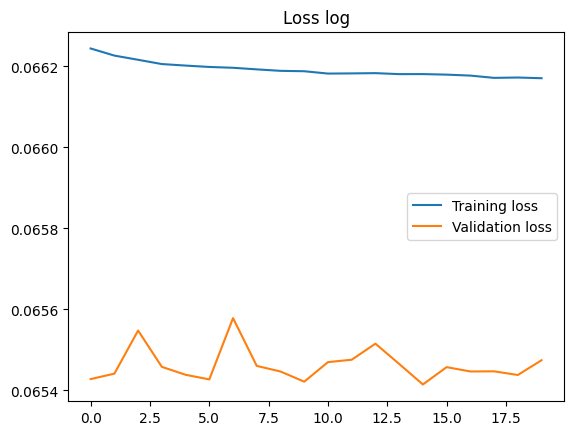

In [28]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.title("Loss log")
plt.show()

In [29]:
y_pred = model.predict(x_test)


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 404us/step


In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("r2: ", r2)

MSE:  0.0655489151324562
r2:  -0.0012816103237389131


In [33]:
import pickle

# Save the Keras model as .h5
model.save("lstm_model.h5")

# Save the file path using pickle
with open("model.pkl", "wb") as f:
    pickle.dump("lstm_model.h5", f)

In [ ]:
import tensorflow as tf
import tf2onnx

# Load the Keras model
model = tf.keras.models.load_model("lstm_model.h5", compile=False)

In [ ]:
import tensorflow as tf
import tf2onnx

# Load the Keras model
model = tf.keras.models.load_model("lstm_model.h5", compile=False)

# Ensure model input shape is known
input_signature = [tf.TensorSpec(shape=model.input_shape, dtype=tf.float32, name="input")]

# Convert the Keras model to ONNX
onnx_model, _ = tf2onnx.convert.from_keras(model, opset=13, input_signature=input_signature)

# Save the ONNX model
onnx_filename = "lstm_model.onnx"
with open(onnx_filename, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"✅ Conversion successful! Model saved as {onnx_filename}")

In [ ]:
import onnx

onnx_model = onnx.load("lstm_model.onnx")
onnx.checker.check_model(onnx_model)

print("✅ ONNX model is valid!")